# 【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\begin{bmatrix} 1.0 & 0.8 \\ 0.8 & 1.0 \end{bmatrix}
$$

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。

numpy.random.multivariate_normal — NumPy v1.16 Manual

作成したndarrayのshapeは(500, 2)になります。

In [144]:
import numpy as np

mu = [-3, 0]
sigma = [[1.0, 0.8], [0.8, 1.0]]

# シード値を０固定
np.random.seed(0)
np.random.multivariate_normal(mu, sigma,500)

array([[-4.80006782e+00, -1.54698618e+00],
       [-4.63714503e+00, -2.19879728e-01],
       [-4.46267867e+00, -2.08076347e+00],
       [-3.85346966e+00, -9.49196365e-01],
       [-3.03192065e+00,  2.27764648e-01],
       [-3.59653339e+00,  3.23229932e-01],
       [-3.76046080e+00, -6.83506760e-01],
       [-3.52660272e+00, -3.15568548e-01],
       [-4.35253112e+00, -1.48228460e+00],
       [-3.02691331e+00, -5.67090887e-01],
       [-7.84713550e-01,  2.62867115e+00],
       [-3.58538300e+00, -1.05476937e+00],
       [-4.69336749e+00, -2.61318911e+00],
       [-2.98421761e+00, -1.02603072e-01],
       [-4.91877408e+00, -9.89469999e-01],
       [-3.26658152e+00, -2.74105461e-02],
       [-1.53138965e+00,  2.15844669e-01],
       [-2.71938344e+00,  3.79500330e-01],
       [-4.54738211e+00, -7.86930327e-01],
       [-2.53695299e+00,  2.71853959e-01],
       [-1.55620621e+00,  5.45695585e-01],
       [-1.99817931e+00,  2.23559938e+00],
       [-2.37797023e+00,  3.44967255e-01],
       [-2.

# 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。

散布図はmatplotlibのplt.scatter()を使うことで描けます。

matplotlib.pyplot.scatter — Matplotlib 3.1.1 documentation

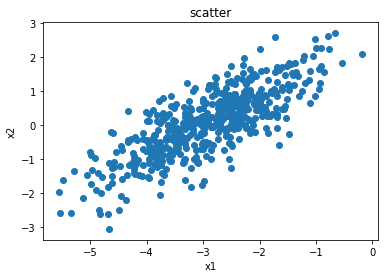

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

# 乱数生成
np.random.seed(0)
random_num = np.random.multivariate_normal(mu, sigma,500)
x1 = random_num[:, 0]
x2 = random_num[:, 1]

# プロット
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scatter')
plt.scatter(x1, x2);

# 【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。

ヒストグラムはplt.hist()を使うことで描けます。

matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation

各次元ごとに作成し、2つのヒストグラムとしてください。

それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation

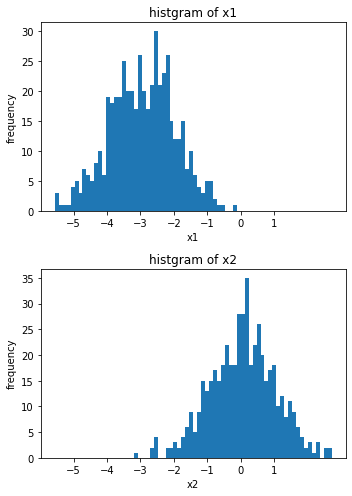

In [146]:
import math

# サイズ調整
plt.figure(figsize=(5, 7))

# x１プロット
plt.subplot(2, 1, 1)
plt.xlabel('x1')
plt.ylabel('frequency')
plt.title('histgram of x1')
plt.xticks(np.arange(math.ceil(random_num.min()), math.floor(random_num.max()), 1))
plt.hist(x1, bins=70, range=(random_num.min(), random_num.max()))

# x２プロット
plt.subplot(2, 1, 2)
plt.xlabel('x2')
plt.ylabel('frequency')
plt.title('histgram of x2')
plt.xticks(np.arange(math.ceil(random_num.min()), math.floor(random_num.max()), 1))
plt.hist(x2, bins=70, range=(random_num.min(), random_num.max()))
plt.tight_layout();

# 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\begin{bmatrix} 1.0 & 0.8 \\ 0.8 & 1.0 \end{bmatrix}
$$

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。

In [147]:
# 乱数生成
mu2 = [0, -3]

np.random.seed(0)
random_num2 = np.random.multivariate_normal(mu2, sigma,500)

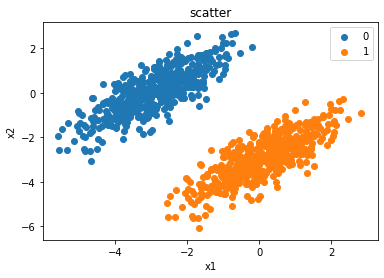

In [148]:
# プロット
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scatter')

plt.scatter(random_num[:, 0], random_num[:, 1])
plt.scatter(random_num2[:, 0], random_num2[:, 1])
plt.legend(['0', '1']);

# 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。

numpy.concatenate — NumPy v1.16 Manual

numpy.vsplit — NumPy v1.16 Manual

In [149]:
random_combine = np.row_stack([random_num, random_num2])
random_combine.shape

(1000, 2)

# 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

機械学習に使用するデータセットはこのような形になっていることが多いです。

In [150]:
random_combine_label = np.column_stack([random_combine,
                                        np.zeros((random_combine.shape[0],1))])

random_combine_label[500:, 2] = 1
print(random_combine_label)

[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.40484501 -3.14372258  1.        ]
 [ 0.1584315  -2.78199606  1.        ]
 [ 1.20196495 -2.02452628  1.        ]]


In [154]:
# 問題１と２の区切りでラベルが正しく付けられているか確認
print(random_combine_label[498:502, :])

[[-2.8415685   0.21800394  0.        ]
 [-1.79803505  0.97547372  0.        ]
 [-1.80006782 -4.54698618  1.        ]
 [-1.63714503 -3.21987973  1.        ]]
